In [2]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [3]:
import numpy as np
import random 
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

utils.reset_seeds(0)

In [5]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=4, activation='relu', name="layer_1"),
    layers.Dense(units=4, activation='relu', name="layer_2"),
    layers.Dense(units=1, activation='linear', name="layer_3"),
])

X = np.linspace(-1, 1, 50)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

# model.compile(
#     optimizer=keras.optimizers.Adam(
#         learning_rate=0.01, amsgrad=True, epsilon=0.01),
#     loss=keras.losses.MeanSquaredError(),
#     metrics=[keras.metrics.MeanSquaredError()],
# )
model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.01, amsgrad=False, epsilon=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                callbacks=[CustomLogger(100)])


Epoch:   0 | Loss: 1.17124e-01
Epoch: 100 | Loss: 2.71762e-04
Epoch: 200 | Loss: 1.38421e-04
Epoch: 300 | Loss: 1.46988e-04
Epoch: 400 | Loss: 1.73697e-04
Epoch: 500 | Loss: 2.04692e-04
Epoch: 600 | Loss: 3.26618e-04
Epoch: 700 | Loss: 1.52510e-04
Epoch: 800 | Loss: 1.74762e-04
Epoch: 900 | Loss: 2.69240e-04


In [ ]:
Slopes.breakpoint_finder(model, np.linspace(-20,20,10000), [1,2,3])

313/313 [==============================] - 0s 1ms/step


[((-1.1701170117011692, 0.97378826), array([0, 1], dtype=int64)),
 ((-0.990099009900991, 0.9702553), array([0, 1, 4], dtype=int64)),
 ((-0.6460646064606443, 0.3989349), array([0, 1, 4, 7], dtype=int64)),
 ((-0.2980298029802988, 0.064740896), array([1, 4, 7], dtype=int64)),
 ((0.042004200420041826, -0.020785332), array([1, 3, 4, 7], dtype=int64)),
 ((0.34203420342034363, 0.09525818), array([1, 3, 4, 6, 7], dtype=int64)),
 ((0.6260626062606249, 0.3748389), array([1, 3, 4, 5, 6, 7], dtype=int64)),
 ((0.7980798079807983, 0.63822114), array([1, 3, 4, 5, 6], dtype=int64)),
 ((1.0101010101010104, 1.0051197), array([3, 4, 5, 6], dtype=int64)),
 ((1.6541654165416553, 1.9433233), array([3, 4, 5, 6, 7], dtype=int64)),
 ((2.0262026202620262, 2.5087273), array([3, 5, 6, 7], dtype=int64))]

In [6]:
Slopes.breakpoint_finder(model, np.linspace(-20,20,10000), [1,2,3])

313/313 [==============================] - 1s 1ms/step


[((-1.1621162116211607, 0.98812425), array([0, 1], dtype=int64)),
 ((-1.0061006100610044, 0.9826772), array([0, 1, 4], dtype=int64)),
 ((-0.6180618061806165, 0.3549465), array([0, 1, 4, 7], dtype=int64)),
 ((-0.21402140214021514, 0.02083522), array([1, 4, 7], dtype=int64)),
 ((0.15801580158015938, 0.005554676), array([1, 3, 4, 7], dtype=int64)),
 ((0.46204620462046364, 0.19581932), array([1, 3, 4, 6, 7], dtype=int64)),
 ((0.7420742074207425, 0.5258534), array([1, 3, 4, 5, 6, 7], dtype=int64)),
 ((1.5101510151015098, 1.8446794), array([3, 4, 5, 6, 7], dtype=int64))]

4/4 [==============================] - 0s 2ms/step
model contains 6 breaks
32/32 [==============================] - 0s 984us/step


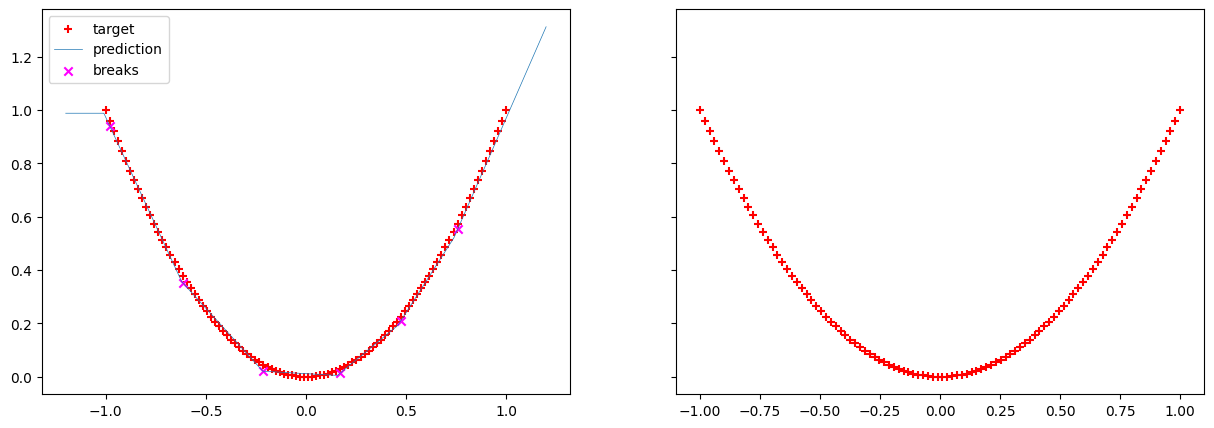

In [7]:
X_joonis = np.linspace(-1,1,100)
y_joonis = X_joonis**2
utils.joonista(model, X_joonis, y_joonis)


In [8]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[-1.604277  , -0.3347738 , -0.02979168,  1.2097183 ]],
       dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(4,) dtype=float32, numpy=array([-0.34494385,  0.50514734, -0.03466576, -0.19053146], dtype=float32)>,
 <tf.Variable 'layer_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-1.2753638 , -0.67812616,  0.00668686, -0.79155767],
        [ 0.67615134, -0.6896932 , -0.4731318 ,  0.8907268 ],
        [-0.41694328, -0.46345466, -0.17998412, -0.57981724],
        [ 0.09975781,  0.6472753 ,  0.9133746 ,  0.77802736]],
       dtype=float32)>,
 <tf.Variable 'layer_2/bias:0' shape=(4,) dtype=float32, numpy=array([ 1.0553987 , -0.2780011 , -0.16697012, -0.11946054], dtype=float32)>,
 <tf.Variable 'layer_3/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.89244395],
        [ 0.5363756 ],
        [ 0.4377301 ],
        [ 0.8182696 ]], dtype=float32)>,
 <tf.Variable 'layer_3/bias:0' shape=(1,) dtyp

In [29]:
simple_weights = tf.keras.models.clone_model(model)

In [30]:
simple_weights.get_layer('layer_1').set_weights([w*10 for w in model.get_layer('layer_1').get_weights()])
simple_weights.get_layer('layer_2').set_weights([w*10 for w in model.get_layer('layer_2').get_weights()])
simple_weights.get_layer('layer_3').set_weights([w*10 for w in model.get_layer('layer_3').get_weights()])

In [31]:
simple_weights.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[-16.04277   ,  -3.347738  ,  -0.29791677,  12.097183  ]],
       dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(4,) dtype=float32, numpy=array([-3.4494386 ,  5.0514736 , -0.34665763, -1.9053147 ], dtype=float32)>,
 <tf.Variable 'layer_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-12.753638  ,  -6.7812614 ,   0.06686862,  -7.915577  ],
        [  6.761513  ,  -6.896932  ,  -4.731318  ,   8.907269  ],
        [ -4.1694326 ,  -4.6345468 ,  -1.7998412 ,  -5.7981725 ],
        [  0.99757814,   6.4727535 ,   9.133746  ,   7.7802734 ]],
       dtype=float32)>,
 <tf.Variable 'layer_2/bias:0' shape=(4,) dtype=float32, numpy=array([10.5539875, -2.780011 , -1.6697012, -1.1946054], dtype=float32)>,
 <tf.Variable 'layer_3/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-8.924439 ],
        [ 5.3637557],
        [ 4.377301 ],
        [ 8.182696 ]], dtype=float32)>,
 <tf.Variable 'layer_3/bias:0' sha

In [35]:
simple_weights.predict([[0.9]])/1000

1/1 [==============================] - 0s 44ms/step


array([[0.9544674]], dtype=float32)

In [36]:
model.predict([[0.9]])

1/1 [==============================] - 0s 40ms/step


array([[0.7970579]], dtype=float32)

In [40]:
simple_weights.predict([np.linspace(-1.2, 1.2, 1000)])

32/32 [==============================] - 0s 2ms/step


array([[ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.88124275e+00],
       [ 9.8

see selline simple weights ei tööta, proovime teisiti asja.

In [79]:
utils.reset_seeds(2002)

simple_weights = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=4, activation='relu', name="layer_1"),
    layers.Dense(units=4, activation='relu', name="layer_2"),
    layers.Dense(units=1, activation='linear', name="layer_3"),
])

model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.01, amsgrad=False, epsilon=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError()],
)

# ei saa lihtsalt kõiki kaale kümnega korrutada, biased tuleb iga kord 10**n+1 astmega korrutada
new_l1 = [w*10 for w in model.get_layer('layer_1').get_weights()]
new_l1[0] = np.around(new_l1[0])
new_l1[1] = np.around(new_l1[1])

new_l2 = [w*10 for w in model.get_layer('layer_2').get_weights()]
new_l2[1] *= 10
new_l2[0] = np.around(new_l2[0])
new_l2[1] = np.around(new_l2[1])

new_l3 = [w*10 for w in model.get_layer('layer_3').get_weights()]
new_l3[1] *= 100
new_l3[0] = np.around(new_l3[0])
new_l3[1] = np.around(new_l3[1])


simple_weights.get_layer('layer_1').set_weights(new_l1)
simple_weights.get_layer('layer_2').set_weights(new_l2)
simple_weights.get_layer('layer_3').set_weights(new_l3)
simple_weights.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 4) dtype=float32, numpy=array([[-16.,  -3.,  -0.,  12.]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(4,) dtype=float32, numpy=array([-3.,  5., -0., -2.], dtype=float32)>,
 <tf.Variable 'layer_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-13.,  -7.,   0.,  -8.],
        [  7.,  -7.,  -5.,   9.],
        [ -4.,  -5.,  -2.,  -6.],
        [  1.,   6.,   9.,   8.]], dtype=float32)>,
 <tf.Variable 'layer_2/bias:0' shape=(4,) dtype=float32, numpy=array([106., -28., -17., -12.], dtype=float32)>,
 <tf.Variable 'layer_3/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-9.],
        [ 5.],
        [ 4.],
        [ 8.]], dtype=float32)>,
 <tf.Variable 'layer_3/bias:0' shape=(1,) dtype=float32, numpy=array([988.], dtype=float32)>]

In [49]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[-1.604277  , -0.3347738 , -0.02979168,  1.2097183 ]],
       dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(4,) dtype=float32, numpy=array([-0.34494385,  0.50514734, -0.03466576, -0.19053146], dtype=float32)>,
 <tf.Variable 'layer_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-1.2753638 , -0.67812616,  0.00668686, -0.79155767],
        [ 0.67615134, -0.6896932 , -0.4731318 ,  0.8907268 ],
        [-0.41694328, -0.46345466, -0.17998412, -0.57981724],
        [ 0.09975781,  0.6472753 ,  0.9133746 ,  0.77802736]],
       dtype=float32)>,
 <tf.Variable 'layer_2/bias:0' shape=(4,) dtype=float32, numpy=array([ 1.0553987 , -0.2780011 , -0.16697012, -0.11946054], dtype=float32)>,
 <tf.Variable 'layer_3/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.89244395],
        [ 0.5363756 ],
        [ 0.4377301 ],
        [ 0.8182696 ]], dtype=float32)>,
 <tf.Variable 'layer_3/bias:0' shape=(1,) dtyp

2/2 [==============================] - 0s 5ms/step
model contains 6 breaks
32/32 [==============================] - 0s 2ms/step


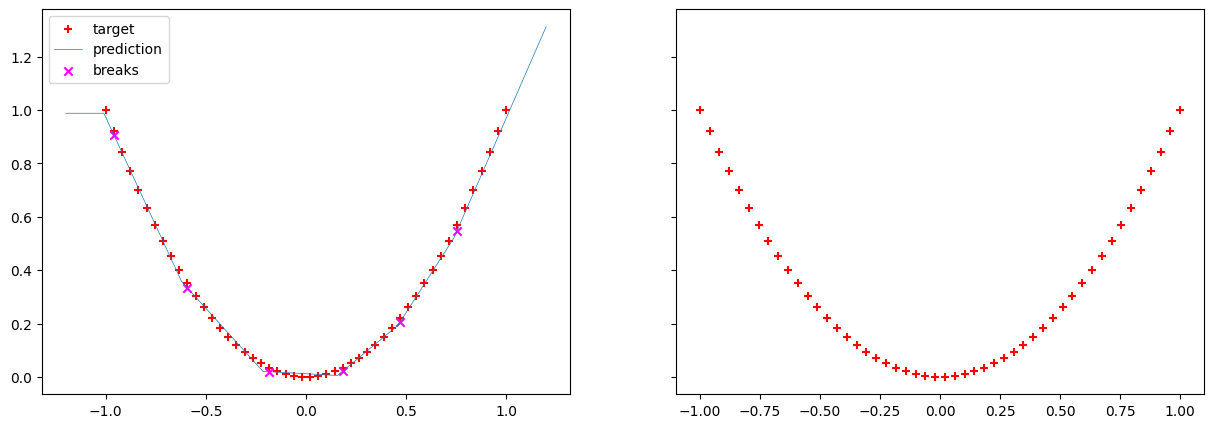

In [80]:
utils.joonista(model, X_train, y_train)

2/2 [==============================] - 0s 4ms/step
model contains 6 breaks
32/32 [==============================] - 0s 1ms/step


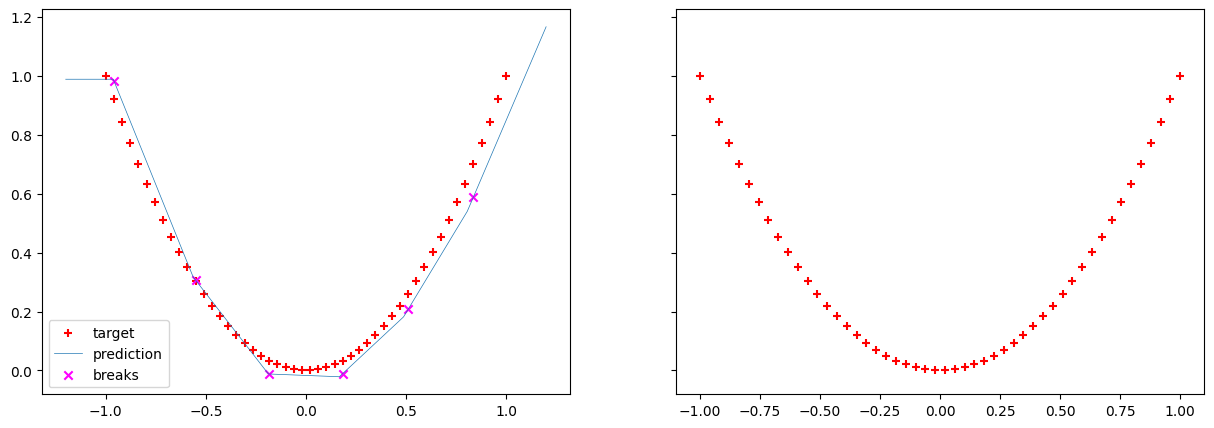

In [81]:
utils.joonista_temp(simple_weights, X_train, y_train)

## simple_weights 
on võrk mille iga element on täisarv ja 10x suurem kui õigel võrgul. Täpsus on veidi kehvem, aga seevastu mugavam. 

kasutada joonista_temp, et asjad jõuaksid õigel skaalal pildile

## TODO

## Random func

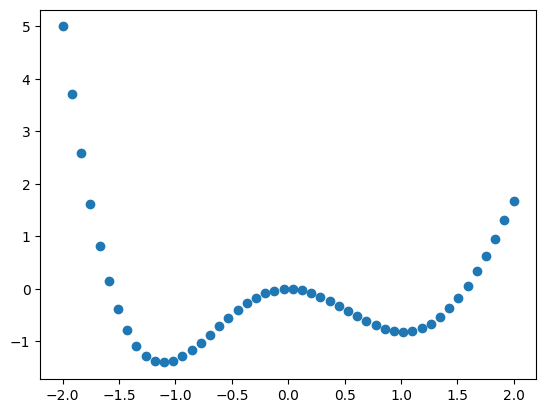

In [93]:
xs = np.linspace(-2, 2, 50)
func = np.cos(xs) * (0.5*xs**3 - 2*xs**2)
plt.scatter(xs, func)

In [98]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=4, activation='relu', name="layer_1"),
    layers.Dense(units=4, activation='relu', name="layer_2"),
    layers.Dense(units=1, activation='linear', name="layer_3"),
])

X = np.linspace(-2, 2, 50)
y = np.cos(xs) * (0.5*xs**3 - 2*xs**2)

# X_train, y_train = X, y
# X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

# model.compile(
#     optimizer=keras.optimizers.Adam(
#         learning_rate=0.01, amsgrad=True, epsilon=0.01),
#     loss=keras.losses.MeanSquaredError(),
#     metrics=[keras.metrics.MeanSquaredError()],
# )
model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.01, amsgrad=True, epsilon=0.01),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=5000, verbose=0,
                callbacks=[CustomLogger(100)])


Epoch:   0 | Loss: 1.57223e+00
Epoch: 100 | Loss: 5.07084e-01
Epoch: 200 | Loss: 1.18391e-01
Epoch: 300 | Loss: 6.12023e-02
Epoch: 400 | Loss: 4.90941e-02
Epoch: 500 | Loss: 3.29780e-02
Epoch: 600 | Loss: 3.95323e-02
Epoch: 700 | Loss: 2.96769e-02
Epoch: 800 | Loss: 4.90996e-02
Epoch: 900 | Loss: 3.18314e-02
Epoch: 1000 | Loss: 3.65608e-02
Epoch: 1100 | Loss: 6.34884e-02
Epoch: 1200 | Loss: 3.00058e-02
Epoch: 1300 | Loss: 3.33753e-02
Epoch: 1400 | Loss: 3.80485e-02
Epoch: 1500 | Loss: 3.54755e-02
Epoch: 1600 | Loss: 4.74750e-02
Epoch: 1700 | Loss: 3.10937e-02
Epoch: 1800 | Loss: 2.93634e-02
Epoch: 1900 | Loss: 2.91845e-02
Epoch: 2000 | Loss: 2.95900e-02
Epoch: 2100 | Loss: 3.07248e-02
Epoch: 2200 | Loss: 3.20629e-02
Epoch: 2300 | Loss: 2.99064e-02
Epoch: 2400 | Loss: 2.85142e-02
Epoch: 2500 | Loss: 4.98607e-02
Epoch: 2600 | Loss: 4.11731e-02
Epoch: 2700 | Loss: 3.86340e-02
Epoch: 2800 | Loss: 3.26454e-02
Epoch: 2900 | Loss: 3.41501e-02
Epoch: 3000 | Loss: 3.64318e-02
Epoch: 3100 | Loss

32/32 [==============================] - 0s 1ms/step
model contains 8 breaks
32/32 [==============================] - 0s 1ms/step


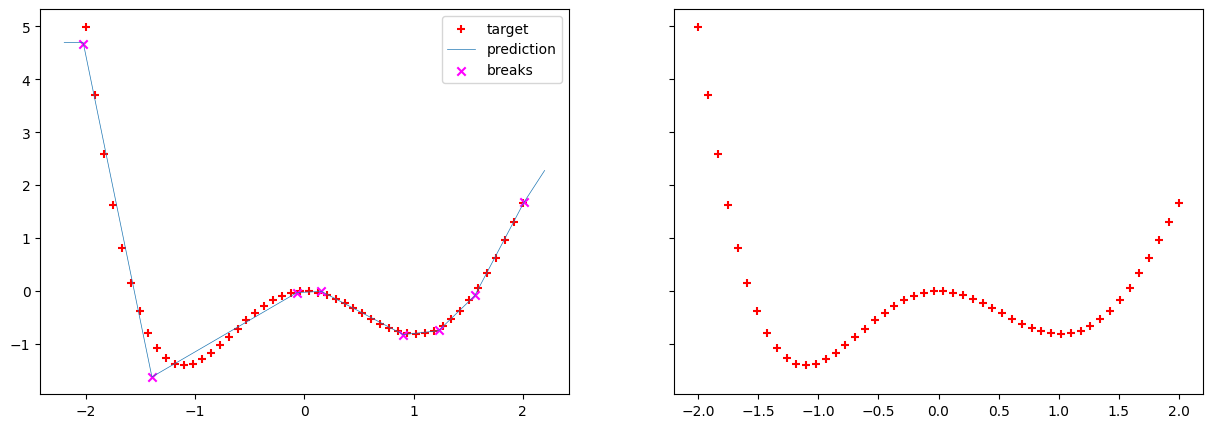

In [109]:
pilt = utils.joonista(model, X, y)

In [113]:
pilt[1][0]

AttributeError: 'AxesSubplot' object has no attribute 'show'